In [1]:
import pathlib
import pandas
path = pathlib.Path('/home/yi/MEGAsync/NeuralODE_Resuls/spiral2d_experiment/20191113_033526/')
pandas.read_csv(path/'1'/'loss.csv', index_col=0, header=None, names=['step', 'loss', 'time']).tail()

,loss,time
step,,
9995,0.000039,1.580402
9996,0.000156,3.951005
9997,0.000089,4.267086
9998,0.000106,1.580402
9999,0.000153,2.212563


In [2]:
from matplotlib import cm
pandas.read_csv(path/'1'/'loss.csv', header=None, names=['step', 'loss', 'time']).plot.scatter('loss', 'time', c='step', colormap=cm.plasma, logx=True)

In [3]:
results = pandas.concat([pandas.read_csv(path/str(i+1)/'loss.csv', header=None, names=['step', 'loss', 'time']) for i in range(84)], axis=0)
len(results)

840000

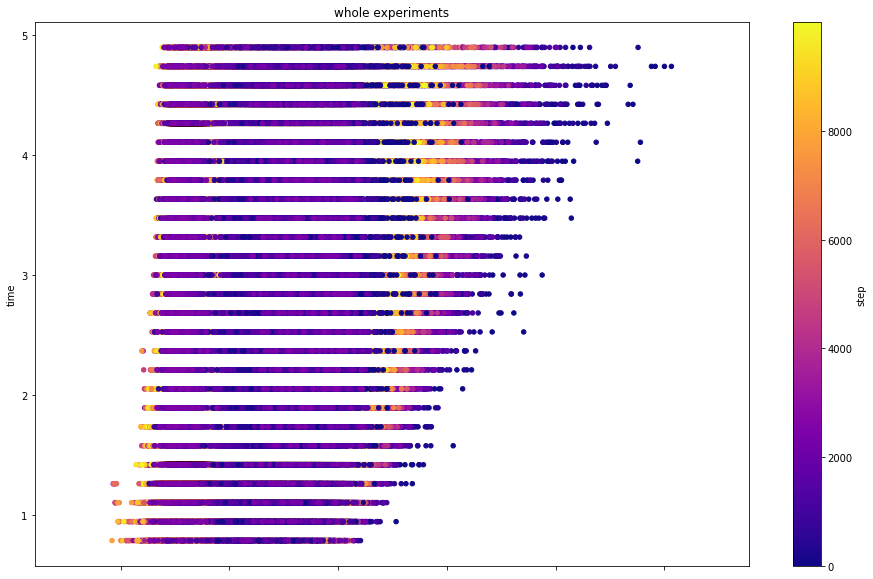

In [4]:
from matplotlib import cm
pandas.concat(
    [pandas.read_csv(path/str(i+1)/'loss.csv', header=None, names=['step', 'loss', 'time']) for i in range(100)],
    axis=0,
).plot.scatter(
    'loss', 'time', c='step',
    colormap=cm.plasma, logx=True, title='whole experiments',
    figsize=(16,10)
)

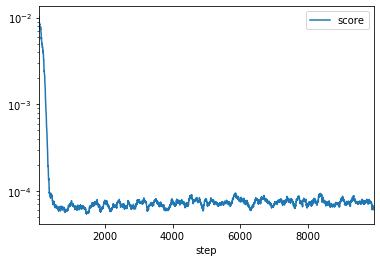

In [5]:
result1 = pandas.read_csv(path/'1'/'loss.csv', header=None, names=['step', 'loss', 'time'])
result1['score'] = result1['loss']/result1['time']
result1.rolling(100, center=True).mean().plot('step', 'score', logy=True)

In [12]:
for i in range(100):
    df = pandas.read_csv(path/str(i+1)/'loss.csv', header=None, names=['step', 'loss', 'time'])
    print(i+1, len(df))

1 10000
2 10000
3 10000
4 10000
5 10000
6 10000
7 10000
8 10000
9 10000
10 10000
11 10000
12 10000
13 10000
14 10000
15 10000
16 10000
17 10000
18 10000
19 10000
20 10000
21 10000
22 10000
23 10000
24 10000
25 10000
26 10000
27 10000
28 10000
29 10000
30 10000
31 10000
32 10000
33 10000
34 10000
35 10000
36 10000
37 10000
38 10000
39 10000
40 10000
41 10000
42 10000
43 10000
44 10000
45 10000
46 10000
47 10000
48 10000
49 10000
50 10000
51 10000
52 10000
53 10000
54 10000
55 10000
56 10000
57 10000
58 10000
59 10000
60 10000
61 10000
62 10000
63 10000
64 10000
65 10000
66 10000
67 10000
68 10000
69 10000
70 10000
71 10000
72 10000
73 10000
74 10000
75 10000
76 10000
77 10000
78 10000
79 10000
80 10000
81 10000
82 10000
83 10000
84 10000
85 10000
86 10000
87 10000
88 10000
89 10000
90 10000
91 10000
92 10000
93 10000
94 10000
95 10000
96 10000
97 2756
98 2791
99 2601
100 2524


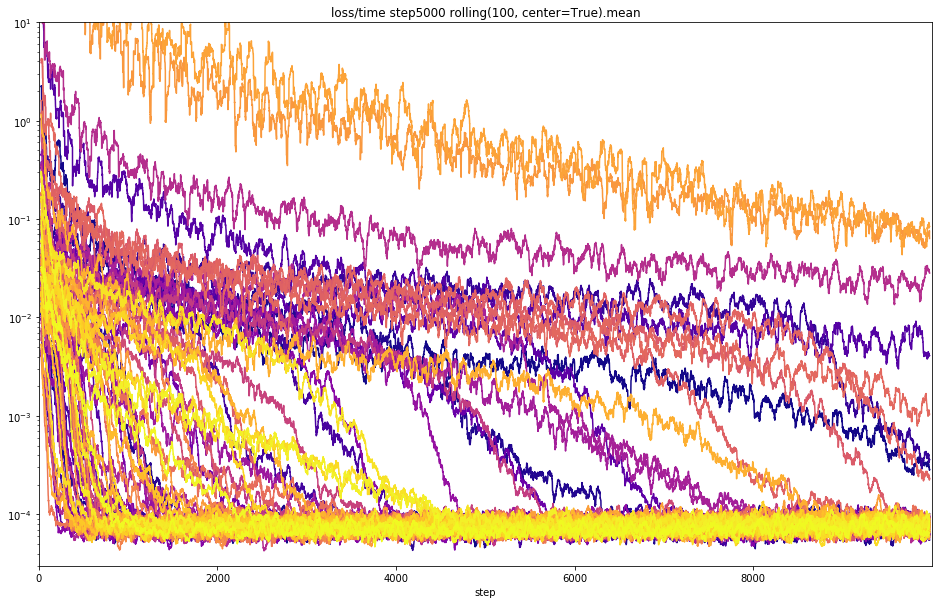

In [24]:
score_df = pandas.DataFrame()
for i in range(96):
    df = pandas.read_csv(path/str(i+1)/'loss.csv', header=None, names=['step', 'loss', 'time'])
    score_df['step'] = df['step']
    score_df[str(i+1)] = (df['loss'] / df['time']).rolling(50, center=True).mean()
ax = score_df.plot(x='step', logy=True, figsize=(16, 10), colormap=cm.plasma, legend=False, ylim=(3.0e-5, 10), title='loss/time step5000 rolling(100, center=True).mean')

In [7]:
import matplotlib.pyplot as plt
fig = ax.get_figure()
fig.savefig(path/'rolling100mean.png')

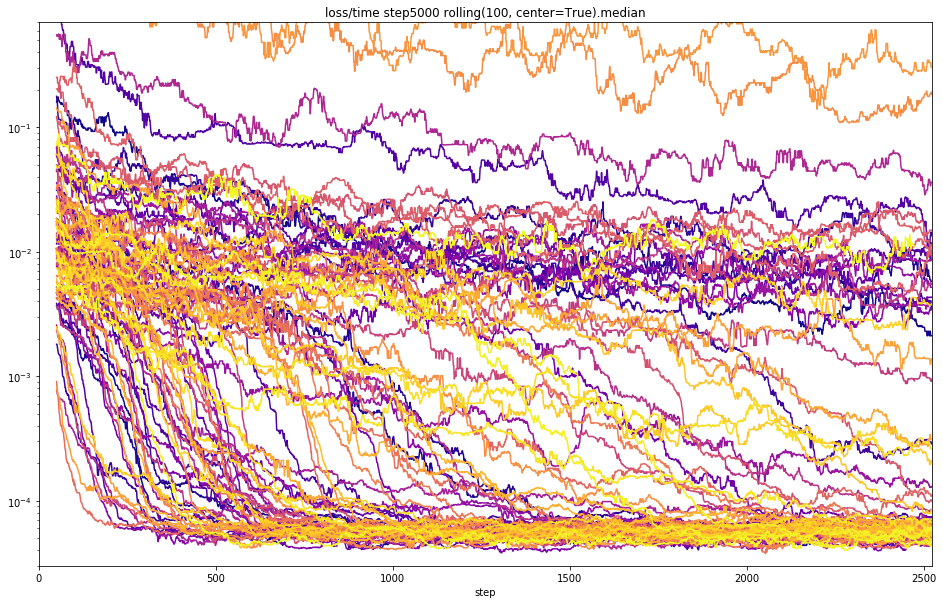

In [8]:
score_df = pandas.DataFrame()
for i in range(100):
    df = pandas.read_csv(path/str(i+1)/'loss.csv', header=None, names=['step', 'loss', 'time'])
    score_df['step'] = df['step']
    score_df[str(i+1)] = (df['loss'] / df['time']).rolling(100, center=True).median()
ax = score_df.plot(x='step', logy=True, figsize=(16, 10), colormap=cm.plasma, legend=False, ylim=(3.0e-5, 0.7), title='loss/time step5000 rolling(100, center=True).median')

In [9]:
ax.get_figure().savefig(path/'rolling100median.png')